In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

In [2]:
DATASET_PATH = "data/alpha.csv"
DATA_FIELDS = ["phoneOrientation","startX","startY","endX","endY","minX","maxX","minY","maxY","midX","meanX","stdX","midY","meanY","stdY","duration","interSwipeInterval","meanDistance","maxDistance","midDistance","stdDistance","trajectoryLength","directLength","maxDeviationDistance","directFullTrajectoryRatio","maxPressure","meanPressure","medianPressure","initPressure","midPressure","meanArea","medianArea","midArea","meanVelocity","medianVelocity","eightyPercVelocity","twentyPercVelocity","medianLastThreePointsVelocity","maxVelocity","midVelocity","stdVelocity","meanAcceleration","medianAcceleration","eightyPercAcceleration","twentyPercAcceleration","medianFirstFiveAcceleration","maxAcceleration","midAcceleration","stdAcceleration"]
LABEL_FIELDS = "userId"
FIELDS = [LABEL_FIELDS] + DATA_FIELDS

In [81]:
df = pd.read_csv(DATASET_PATH, usecols=FIELDS)
df[LABEL_FIELDS] = df[LABEL_FIELDS].apply(lambda x: int(x[1:]))
df = df[df.userId.map(lambda x: x in [1,12,25,31])]
df.head()

,userId,phoneOrientation,startX,startY,endX,endY,minX,maxX,minY,maxY,...,midVelocity,stdVelocity,meanAcceleration,medianAcceleration,eightyPercAcceleration,twentyPercAcceleration,medianFirstFiveAcceleration,maxAcceleration,midAcceleration,stdAcceleration
3180,1,1,253.0,296.0,81.0,360.0,81.0,253.0,296.0,360.0,...,8309.996743,5754.511752,1.291418e+06,104856.791259,6.879422e+06,62113.105273,62113.105273,6.879422e+06,3.447600e+06,2.506678e+06
3181,1,1,121.0,291.0,290.0,258.0,121.0,290.0,258.0,291.0,...,1354.276928,1056.509599,4.177340e+04,29298.865613,7.220960e+04,17574.472308,29298.865613,1.101337e+05,5.943428e+04,3.524845e+04
3182,1,1,277.0,263.0,60.0,352.0,60.0,277.0,263.0,352.0,...,1281.114019,1008.257107,3.294554e+05,69032.763906,1.176540e+06,38530.236978,69032.763906,1.176540e+06,5.898781e+05,4.902769e+05
3183,1,1,223.0,307.0,55.0,406.0,55.0,223.0,307.0,406.0,...,1857.134967,1410.519720,1.104376e+05,82850.819472,2.476202e+05,29478.531267,82850.819472,2.476202e+05,1.380244e+05,9.050388e+04
3184,1,1,125.0,302.0,319.0,278.0,125.0,319.0,276.0,302.0,...,2537.987923,1765.200835,1.005064e+05,85537.760691,1.485998e+05,59897.405336,85537.760691,1.812004e+05,1.097437e+05,4.734516e+04


In [79]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 3180 to 17440
Data columns (total 50 columns):
userId                           2685 non-null int64
phoneOrientation                 2685 non-null int64
startX                           2685 non-null float64
startY                           2685 non-null float64
endX                             2685 non-null float64
endY                             2685 non-null float64
minX                             2685 non-null float64
maxX                             2685 non-null float64
minY                             2685 non-null float64
maxY                             2685 non-null float64
midX                             2685 non-null float64
meanX                            2685 non-null float64
stdX                             2685 non-null float64
midY                             2685 non-null float64
meanY                            2685 non-null float64
stdY                             2685 non-null float64
duration     

In [82]:
data = df[DATA_FIELDS]
y = df[LABEL_FIELDS]
x_train, x_test, y_train, y_test = train_test_split(
            data,
            y,
            test_size=0.2,
            shuffle=True,
            random_state=255)
print(data.shape, y.shape)

(2053, 49) (2053,)


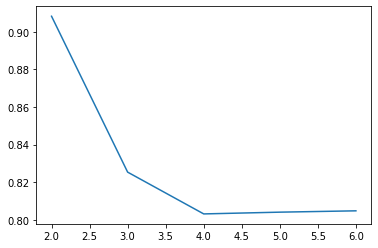

In [83]:
sse_ = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, max_iter=50).fit(x_train)
    sse_.append([k, silhouette_score(x_train, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

In [84]:
K = 4
kmeans = KMeans(n_clusters=K, max_iter=50).fit(x_train)
results = kmeans.predict(x_test)
i = 0
correct = 1
false = 1
# for result in results:
#     print(y_test.values[i], result)
#     if y_test.values[i] == result:
#         correct += 1
#     else:
#         false += 1
#     i += 1

# print("result", correct/(correct+false))
# for cluster in range(K):
#     print("elements in cluster", cluster, " : ", list(results).count(cluster))
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
for elem, count in zip(unique_elements, counts_elements):
    print("elements in y_test", elem, " : ", count)

unique_elements, counts_elements = np.unique(results, return_counts=True)
for elem, count in zip(unique_elements, counts_elements):
    print("elements in cluster", elem, " : ", count)


elements in y_test 1  :  225
elements in y_test 12  :  79
elements in y_test 25  :  45
elements in y_test 31  :  62
elements in cluster 0  :  365
elements in cluster 1  :  6
elements in cluster 2  :  3
elements in cluster 3  :  37


In [77]:
__

(array([0, 1, 2, 3]), array([496,  19,  21,   1], dtype=int64))